In [ ]:
torch.set_default_dtype(torch.float64)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import torch

# import pyro
# from pyro.contrib.epidemiology.models import SimpleSIRModel

In [ ]:
df = pd.read_csv('./Downloads/data 2/Russia.csv')

In [ ]:
new_cases = torch.FloatTensor(df.loc[:, 'New Cases'].values[::-1].copy())

In [ ]:
from copy import deepcopy

In [ ]:
df = pd.read_csv('./Downloads/data 2/Russia.csv')
total = df.loc[:, 'Total Cases'][::-1].values
# model = HIT(total[:100])

In [ ]:
def gamma(d1, delta, T):
    h = T[d1 + delta - 1] - T[d1 - 1]
    g = (T[d1 + delta] - T[d1 + delta - 1]) / h
    return g if g >=0 else 0

In [ ]:
delta = 10
D = 150
T1 = list(total)[:D + 1]
length = 20

H = {i:0 for i in np.arange(delta+1)}
gamma = {i:0 for i in np.arange(delta+1)}
T = {i:0 for i in np.arange(-1, delta+1)}
I = {0:0}

In [ ]:
cases = df.loc[:, 'New Cases'].values

In [ ]:
for i in range(0, D):
    T.update({i : T[i-1] + cases[i]})
    I[i] = gamma[i]*H[i]
    H[i + 1] = H[i] + I[i] - cases[i]
    c = T[i + delta] - T[i+delta-1]
    h = T[i + delta - 1] - T[i - 1]
    if h==0:
        gamma.update({i:0})
#     else:
        

In [ ]:


T_new = deepcopy(T1)
print(T_new[-5:])
for i in range(delta):
    d = D + i
    
    g = gamma(d - delta, delta, T_new)
    h = T_new[d - 1] - T_new[d - delta - 1]
#     print(h, g,d, len(T_new), T_new[-1])
    c = g*h
    print(h, g,d, len(T_new), c)
    T_new.append(c + T_new[-1])
    
#     else:

In [114]:
# C(d) = gamma(d - \delta) * (T(d - 1) - T(d - \delta - 1))

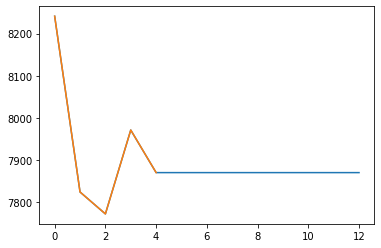

In [115]:
plt.plot(np.diff(T_new[D-5:d]))
plt.plot(np.diff(T1[D-5:d]))